<a href="https://colab.research.google.com/github/kundajelab/locusselect/blob/master/examples/regression%20on%20200%20bp%20genome%20bins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load dragonn tutorial utilities 
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from numpy.random import seed
seed(1234)

In [2]:
#!pip install locusselect 

## Regression K562 DNAse model (trained genomewide), fully connected layer embeddings 

In [3]:
## generate embeddings at the -2 layer 
import locusselect 
from locusselect.embeddings import * 
from locusselect.interpret import * 
from locusselect.utils import * 
from locusselect.gapped_kmers import * 
import numpy as np


Using TensorFlow backend.


In [7]:
coord_prefix="/mnt/lab_data2/annashch/locusselect_examples/coordinates/Gurkan_hg19_loci_coords"
#loci=["BCL11A","HBA2","HBE1","LMO2","MYC","RBM38"]
loci=["LMO2","MYC","RBM38"]
splits=[7,7,7,7,7,7]
for index in range(len(loci)):
    locus=loci[index]
    split=splits[index]
    coords=coord_prefix+"/"+locus+".geneLocus.250bp.windows.hg19.bed"
    #first, we get embeddings from the model fully connected layer 
    fc_embedding_args={"input_bed_file":coords,
                   "model_hdf5":"DNASE.K562.regressionlabels.7.withgc",
                   "ref_fasta":"/users/annashch/male.hg19.fa",
                   "center_on_summit":False,
                   "center_on_bed_interval":True,
                   "flank":500,
                   "embedding_layer_name":"dense_2",
                   "embedding_input_name":"input_1",
                   "expand_dims":True,
                   "threads":20,
                   "output_npz_file":locus+"_FC_layer_NN_embeddings.regression.gc.npz"}
    fc_regions, fc_embeddings = compute_embeddings(fc_embedding_args)
    
    conv1_embedding_args={"input_bed_file":coords,
                   "model_hdf5":"DNASE.K562.regressionlabels.7.withgc",
                   "ref_fasta":"/users/annashch/male.hg19.fa",
                   "center_on_summit":False,
                   "center_on_bed_interval":True,
                   "flank":250,
                   "expand_dims":True,
                   "threads":20,
                   "embedding_layer_name":"conv2d_1",
                   "embedding_input_name":"input_1",
                   "global_pool_on_position":True,
                   "num_rows":1000,
                   "output_npz_file":locus+"_CONV1_layer_NN_embeddings.regression.gc.npz"}
    conv1_regions, conv1_embeddings = compute_embeddings(conv1_embedding_args)
    
    #gradient x input interpretation 
    gc_content=open("../compute_gc/gc."+locus+".bed",'r').read().strip().split('\n')
    gc_vals=np.expand_dims(np.asarray([float(i.split('\t')[-1]) for i in gc_content]),axis=1)
    



got model architecture
loaded model weights
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 1000, 4)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 1, 1000, 300) 23100       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 1, 1000, 300) 1200        conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 1, 1000, 300) 0           batch_normalization_1[0][0]      
_________________________________________________________________

1/1 [==============================] - 8s 8s/step
created data generator from 1000
1/1 [==============================] - 6s 6s/step
created data generator from 2000
1/1 [==============================] - 7s 7s/step
created data generator from 3000
1/1 [==============================] - 7s 7s/step
created data generator from 4000
1/1 [==============================] - 6s 6s/step
created data generator from 5000
1/1 [==============================] - 7s 7s/step
created data generator from 6000
1/1 [==============================] - 7s 7s/step
created data generator from 7000
1/1 [==============================] - 6s 6s/step
created data generator from 8000
1/1 [==============================] - 2s 2s/step
got embeddings
got region labels
writing output file
got model architecture
loaded model weights
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to             

1/1 [==============================] - 9s 9s/step
created data generator from 1000
1/1 [==============================] - 7s 7s/step
created data generator from 2000
1/1 [==============================] - 6s 6s/step
created data generator from 3000
1/1 [==============================] - 8s 8s/step
created data generator from 4000
1/1 [==============================] - 6s 6s/step
created data generator from 5000
1/1 [==============================] - 7s 7s/step
created data generator from 6000
1/1 [==============================] - 7s 7s/step
created data generator from 7000
1/1 [==============================] - 7s 7s/step
created data generator from 8000
1/1 [==============================] - 3s 3s/step
got embeddings
got region labels
writing output file
got model architecture
loaded model weights
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to             

1/1 [==============================] - 9s 9s/step
created data generator from 1000
1/1 [==============================] - 8s 8s/step
created data generator from 2000
1/1 [==============================] - 8s 8s/step
created data generator from 3000
1/1 [==============================] - 13s 13s/step
created data generator from 4000
1/1 [==============================] - 11s 11s/step
created data generator from 5000
1/1 [==============================] - 8s 8s/step
created data generator from 6000
1/1 [==============================] - 9s 9s/step
created data generator from 7000
1/1 [==============================] - 7s 7s/step
created data generator from 8000
1/1 [==============================] - 2s 2s/step
got embeddings
got region labels
writing output file
got model architecture
loaded model weights
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to         

## Compute gradxinput

In [ ]:
#next, we get deepLIFT scores with 0 reference 
gradxinput_args={"input_bed_file":coords,
                "model_hdf5":"/srv/scratch/annashch/deeplearning/encode4crispr/k562_dnase/classification/DNASE.K562.classification.SummitWithin200bpCenter."+str(split),
                "ref_fasta":"/mnt/data/annotations/by_release/hg19/male.hg19.fa",
                "center_on_summit":False,
                "center_on_bed_interval":True,
                "flank":500,
                "expand_dims":True,
                "threads":20,
                "task_index":0,
                "batch_size":500,
                "interpretation_layer":-2,
                "input_grad":True,
                "output_npz_file":locus+".input_grad.npz"}
grad_regions, grad_embeddings=compute_interpretation_scores(gradxinput_args)

In [25]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

## UMAP clustering on fc layer embeddings 

In [20]:
import umap 
fc_embeddings.shape

(4652, 1000)

In [21]:
#we will randomly select 5000 peaks for clustering/visualizing (more than that takes a long time)
n=5000 
indices_for_clustering=np.random.choice(fc_embeddings.shape[0],n) 

In [26]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(fc_embeddings[indices_for_clustering])


In [33]:
standard_embedding.shape

(5000, 2)

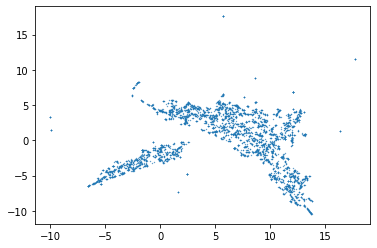

In [27]:

plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=0.1, cmap='Spectral');


In [28]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(fc_embeddings[indices_for_clustering])

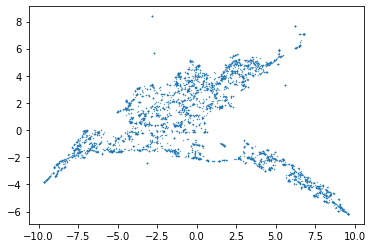

In [29]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], s=0.1, cmap='Spectral');

In [30]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
    
).fit_predict(clusterable_embedding)

W1021 09:59:38.797999 140414126941952 _axes.py:4271] 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


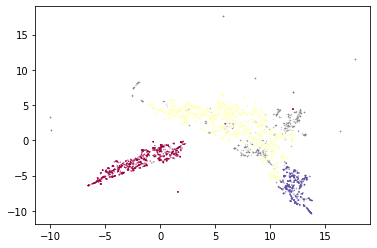

In [31]:
#-1 means the regions were not clustered 
clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');

In [32]:
clustered_regions=fc_regions[indices_for_clustering]
df=pd.DataFrame({'chrom':[i[0] for i in clustered_regions],
                'start':[i[1] for i in clustered_regions],
                'end':[i[2]for i in clustered_regions],
                'labels':labels})
#write to output bed file for analysis of motif enrichment in clusters 
df.to_csv("regression_fc_layer_embeddings_clusters.bed")